<a href="https://colab.research.google.com/github/Mohan75489/DeepLearning_PyTorch/blob/main/PyTorch_Images_and_LR_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Import all required libraries
import torch
import torchvision
from torchvision.datasets import MNIST

In [23]:
#downloading training dataset
dataset = MNIST(root = 'data/', download=True)

In [24]:
#to check the loaded dataset length
len(dataset)

60000

In [99]:
#checking test data length and we don't want to train using this. This is only for showing efficiency of built model.
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [26]:
#checking a random sample
dataset[5]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F2A6FDA1850>, 2)

- First part is image. It's part of a python library is called Pillow (python interpreted of image)
- Second part, is the size of the image.
-Third part, is the label/value in the image.

In [27]:
#to view the image, importing matplotlib
import matplotlib.pyplot as plt
#to show plots in the notebook, instead of pop-up (anything that begins with % sign is called magic command)
%matplotlib inline 

Label: 3


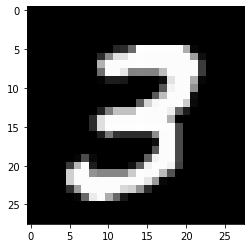

In [28]:
#plotting an image from the dataset. Note image and lable properties of image in dataset.
image, label = dataset[7]
plt.imshow(image, cmap='gray')
print('Label:',label)

In [29]:
#PyTorch operates in tensors, it doesn't know images. It requires transformation of images to tensors.
import torchvision.transforms as transforms

In [30]:
#tranforming dataset to tensors for training, and redefining it. and making it available for training.
dataset = MNIST(root = 'data/', train=True, transform = transforms.ToTensor())

In [31]:
#printing tranformed tensor to view shape
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


- Image is converted into 3D tensor, 1 represents colour, 28 and 28 represent x and y dimension.
- So, each pixel is conveted into an elelemtn of tensor.
- First one is colour channel, for colured image it have 3 parts (Red, Green, Blue).

In [32]:
#looking a some pixels from a specific image.
print(img_tensor[:,10:15,10:15])
#To understand colour variation. 
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


- Element represent colur of pixel.
- 1 is for Black and 0 is for White, everything in between are shades of gray.

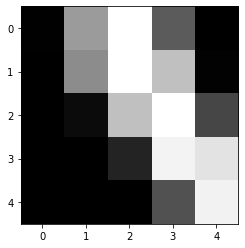

In [33]:
#plotting a 10-15 vertical and horizontal elements of tensor
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [34]:
#splitting the data into 3 sets.
#training dataset, some 50000 images of 60000.
#validation dataset, remaining 10000 images of 60000.
#test dataset, which is given separately in MNIST, 10000.

#splitting 60000 between training and validation set randomly.
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [35]:
#dataloding in batches, training dataset with shuffle on. Validation set no shuffling needed, at least for now.
from torch.utils.data import DataLoader
#smaller batches reduces time to calculate gradients.
batch_size = 125
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

- nn.linear expects vector as inout/2D tensor.
- Each image is group of pixels/element in the tensor.
- Other way of saying above point, number of inputs=number of pixels in image.
- All images in MNIST are 28x28 pixels (or) 784 inputs.
- We are prediction which class the image belongs to (0-9) (or) output would be a tensor with 10 elements (10 outputs).

In [36]:
#creating a model.
import torch.nn as nn
input_size = 28*28
num_classes = 10
#logestic-regression model for a image.
model = nn.Linear(input_size, num_classes)

In [37]:
#printing model weight shape.
print(model.weight.shape)
#printing intial weight tensor.
print(model.weight)
#printing model bias shape.
print(model.bias.shape)
#printing initial bias tensor.
model.bias

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0316, -0.0280, -0.0195,  ...,  0.0014, -0.0317, -0.0258],
        [ 0.0114, -0.0261,  0.0325,  ..., -0.0337, -0.0317, -0.0173],
        [ 0.0067,  0.0051, -0.0205,  ...,  0.0217,  0.0063,  0.0301],
        ...,
        [-0.0250,  0.0165, -0.0228,  ..., -0.0250,  0.0149, -0.0087],
        [-0.0273,  0.0281, -0.0342,  ...,  0.0075,  0.0125,  0.0067],
        [-0.0246, -0.0294, -0.0141,  ..., -0.0124, -0.0131,  0.0296]],
       requires_grad=True)
torch.Size([10])


Parameter containing:
tensor([-0.0225, -0.0353, -0.0143,  0.0263,  0.0227,  0.0288, -0.0163, -0.0313,
        -0.0342, -0.0356], requires_grad=True)

In [38]:
#passing image to developed model in batches.
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([3, 2, 3, 9, 4, 8, 0, 6, 4, 4, 3, 3, 8, 2, 7, 5, 2, 7, 1, 3, 1, 4, 5, 8,
        3, 7, 6, 8, 8, 2, 4, 2, 9, 5, 9, 8, 4, 1, 0, 3, 5, 1, 9, 2, 4, 7, 2, 1,
        5, 8, 1, 1, 3, 9, 2, 7, 3, 4, 8, 8, 0, 6, 9, 9, 6, 9, 8, 4, 8, 1, 5, 4,
        0, 6, 6, 5, 6, 1, 1, 8, 6, 0, 3, 0, 1, 6, 7, 5, 8, 1, 8, 8, 6, 1, 0, 8,
        3, 8, 8, 3, 2, 2, 4, 5, 3, 9, 7, 1, 4, 8, 2, 8, 7, 3, 4, 9, 0, 0, 6, 7,
        8, 1, 7, 2, 4])
torch.Size([125, 1, 28, 28])


RuntimeError: ignored

- We followed sma eprocedure as linear regression, but error occured because we are asking linear regression for "125"/batch size times.
- We know each image has 784 inputs and 10 outputs.
- We discussed nn.lineaar can handle 2D tensors only.

In [39]:
#target is to rehape input/images to 2D tensor.
#we can use rehspe operation of tensor.
images.reshape(125,784).shape

torch.Size([125, 784])

- It is not practical to do it/pass it for each different batch sizes. User can give any batch sie.
- Technique is to extend existing nn.Module calss to add customized classes to work in this notebook.

In [40]:
#Adding customized class extension for nn.Module.
class MnistModel(nn.Module):
  #Constructor of class init
  #self is current batch. default fuction.
  #special line to make init is calss under nn.Module
    def __init__(self): #double underscore structure is important.
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    #init class function
    def forward(self,xb):
          #-1 is the key here, based on passed bacth size it can autocaculate it. 
          #limitation is we need to give inputs/should know image size.
          xb = xb.reshape(-1,784)
          out = self.linear(xb)
          return out

#redefining the model to this Mnistmodel
model = MnistModel()

In [41]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0202, -0.0167, -0.0108,  ...,  0.0302, -0.0144,  0.0029],
         [ 0.0312,  0.0084,  0.0306,  ...,  0.0352, -0.0124,  0.0118],
         [ 0.0292, -0.0237,  0.0318,  ..., -0.0161,  0.0350, -0.0162],
         ...,
         [ 0.0033, -0.0156, -0.0127,  ...,  0.0223,  0.0211,  0.0329],
         [ 0.0301, -0.0314, -0.0178,  ...,  0.0244, -0.0088,  0.0091],
         [-0.0324, -0.0261,  0.0049,  ..., -0.0182, -0.0350, -0.0010]],
        requires_grad=True), Parameter containing:
 tensor([-0.0186,  0.0182,  0.0235, -0.0200, -0.0089,  0.0169,  0.0043,  0.0233,
         -0.0091, -0.0292], requires_grad=True)]

In [42]:
#passing images to built model
for images, labels in train_loader:
    outputs = model(images) #prints probabilities of each class
    print(images.shape)
    break
print('outputs.shape:',outputs.shape)
print('Sample outputs:\n',outputs[:2].data)

torch.Size([125, 1, 28, 28])
outputs.shape: torch.Size([125, 10])
Sample outputs:
 tensor([[ 0.0396,  0.1329,  0.0117, -0.2557,  0.0637, -0.1710,  0.3838, -0.0218,
         -0.0601, -0.1759],
        [-0.1531,  0.1218,  0.0402,  0.1422,  0.1022,  0.0911,  0.1923,  0.1439,
         -0.0995,  0.0268]])


- These probabilities are not mathametically correct.
- Probability cannot be -ve.
- Sum of probabiliites is 1.
- SoftMax function S = e^prob/sum(e^prob).
- SoftMax also pushes highest probability towards 1.

In [43]:
#importing functional module
import torch.nn.functional as F

In [45]:
#printing softmax values
outputs[:3]

tensor([[ 0.0396,  0.1329,  0.0117, -0.2557,  0.0637, -0.1710,  0.3838, -0.0218,
         -0.0601, -0.1759],
        [-0.1531,  0.1218,  0.0402,  0.1422,  0.1022,  0.0911,  0.1923,  0.1439,
         -0.0995,  0.0268],
        [-0.1417,  0.0154, -0.2189,  0.0767, -0.0802, -0.0496, -0.0172, -0.0259,
         -0.2775,  0.1031]], grad_fn=<SliceBackward0>)

In [44]:
#Applying softmax for rach output row/image output
probs = F.softmax(outputs,dim=1)
#printing probabilities of first 3 image outputs
print("Sample probabilities:\n",probs[:3].data)
#for check: adding up probabilities of a image outputs
print("Sum:",torch.sum(probs[3]).item())

Sample probabilities:
 tensor([[0.1030, 0.1130, 0.1001, 0.0766, 0.1055, 0.0834, 0.1453, 0.0968, 0.0932,
         0.0830],
        [0.0803, 0.1057, 0.0974, 0.1079, 0.1037, 0.1025, 0.1134, 0.1081, 0.0847,
         0.0961],
        [0.0917, 0.1073, 0.0849, 0.1141, 0.0975, 0.1005, 0.1039, 0.1030, 0.0801,
         0.1171]])
Sum: 1.0000001192092896


- Softmax sum gives near values of 1, if not exact.
- Note: model is only 12.73% sure that first image is 6. Not great!!!

In [46]:
preds = torch.max(probs,dim=1)
print(preds)

torch.return_types.max(
values=tensor([0.1453, 0.1134, 0.1171, 0.1130, 0.1312, 0.1429, 0.1204, 0.1477, 0.1178,
        0.1311, 0.1185, 0.1298, 0.1262, 0.1193, 0.1263, 0.1147, 0.1245, 0.1142,
        0.2029, 0.1351, 0.1291, 0.1458, 0.1229, 0.1406, 0.1234, 0.1254, 0.1127,
        0.1465, 0.1170, 0.1520, 0.1331, 0.1353, 0.1474, 0.1277, 0.1402, 0.1197,
        0.2080, 0.1097, 0.1203, 0.1248, 0.1409, 0.1206, 0.1286, 0.1470, 0.1445,
        0.1209, 0.1687, 0.1303, 0.1246, 0.1190, 0.1422, 0.1300, 0.1363, 0.1281,
        0.1324, 0.1251, 0.1443, 0.1721, 0.1313, 0.1680, 0.1484, 0.1203, 0.1117,
        0.1315, 0.1359, 0.1142, 0.1649, 0.1371, 0.1140, 0.1391, 0.1581, 0.1147,
        0.1204, 0.1265, 0.1292, 0.1376, 0.1240, 0.1336, 0.1112, 0.1421, 0.1273,
        0.1209, 0.1437, 0.1393, 0.1240, 0.1262, 0.1433, 0.1215, 0.1427, 0.1320,
        0.1156, 0.1301, 0.1212, 0.1231, 0.1211, 0.1788, 0.1438, 0.1345, 0.1205,
        0.1512, 0.1551, 0.1192, 0.1564, 0.1143, 0.1383, 0.1697, 0.1199, 0.1356,
        0

In [47]:
#auto-assigns values to max_probs and indices to preds
max_probs, preds = torch.max(probs, dim=1)
print(preds) #outputs of model
print(max_probs)
print(labels) #actual values

tensor([6, 6, 9, 6, 6, 6, 5, 6, 0, 2, 6, 6, 6, 6, 6, 6, 5, 5, 6, 1, 6, 6, 1, 6,
        9, 6, 5, 6, 5, 6, 5, 9, 6, 7, 6, 4, 6, 5, 7, 9, 5, 9, 5, 6, 4, 7, 6, 4,
        3, 6, 7, 6, 6, 6, 5, 7, 6, 6, 6, 6, 6, 5, 0, 6, 6, 6, 6, 5, 7, 4, 6, 6,
        6, 6, 5, 5, 9, 6, 4, 2, 4, 5, 6, 4, 6, 0, 2, 9, 4, 7, 6, 6, 9, 6, 9, 6,
        6, 9, 9, 6, 9, 3, 6, 9, 6, 6, 2, 5, 7, 7, 6, 2, 9, 6, 4, 6, 6, 5, 5, 2,
        4, 6, 6, 6, 6])
tensor([0.1453, 0.1134, 0.1171, 0.1130, 0.1312, 0.1429, 0.1204, 0.1477, 0.1178,
        0.1311, 0.1185, 0.1298, 0.1262, 0.1193, 0.1263, 0.1147, 0.1245, 0.1142,
        0.2029, 0.1351, 0.1291, 0.1458, 0.1229, 0.1406, 0.1234, 0.1254, 0.1127,
        0.1465, 0.1170, 0.1520, 0.1331, 0.1353, 0.1474, 0.1277, 0.1402, 0.1197,
        0.2080, 0.1097, 0.1203, 0.1248, 0.1409, 0.1206, 0.1286, 0.1470, 0.1445,
        0.1209, 0.1687, 0.1303, 0.1246, 0.1190, 0.1422, 0.1300, 0.1363, 0.1281,
        0.1324, 0.1251, 0.1443, 0.1721, 0.1313, 0.1680, 0.1484, 0.1203, 0.1117,
        0.1315, 

In [48]:
#how many out of given batch correctly predicted
torch.sum(preds==labels)

tensor(15)

- We need to evaluate model while it's training.
- Finding accuracy (how many images are predicted correct) is good way to do that.

In [49]:
#how much percentage accurate the model is predicting
def accuracy(outputs,labels):
  _,preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [50]:
#current accuracy percentage
accuracy(outputs,labels)

tensor(0.1200)

- Accuracy gives percpective about how many images are predicted correctly, but it disregards remaining images from the batch.
- Even torch max picks only the highest prob value as prediction, but it is not always correct.
- From above two points, it is clear that these two functions are helpful to give feedback to model.
- But this is helpful metrics, to make user/human uderstand the model performance.
- Since torch.max and accuracy disregards some values from outputs we can do gradient on those.

We need to define a loss function which can be gradable and gives correct feedback to model.

## cross_entropy as loss fuction
What it does is,
- It picks max probability for each value and applies logerthm to it.
- Then it multiplies the value with (-1).
- from above 2 steps, We can get what is the loss for each image.
- Average of the losses will be calculated for batch, to get model loss.
How it works???
- log(1) = 0 and log(decimal) is high negative values always. Best probability is 1 and worst is 0.
- If model is confident loss will be zero otherwise huge negative value.
- we multiply with (-1) to get it positive.

Key Note: cross_entropy fuction of torch auto-calculates probability for outputs, so only outputs should be passed to it. (no need to do SoftMax)

In [51]:
loss_fn = F.cross_entropy

In [52]:
#defining and printing intial loss
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3384, grad_fn=<NllLossBackward0>)


## Idea of generic 'fit' function.
- Each time some steps are generic. We need to build a genric fuction to accomodate that.
- Functions used in this fit functions are defined specifically for this model, susequently.

In [76]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr) #updating weights and biases
    history = [ ] #for collecting rpoch-wise results

    for epoch in range(epochs):
        #training phase
        for batch in train_loader:
            loss = model.training_step(batch)  #training_step is a function to be defined
            loss.backward() #finding gradients
            optimizer.step()
            optimizer.zero_grad() #setting gradients to zero
        #validation phase
        result = evaluate(model, val_loader) #evaluate is a function to be defined
        model.epoch_end(epoch, result)  #epoch_end to be defined
        history.append(result)
    return history

- epochs, lr, opt_func, batch_size are called hyper parameters, which developer need to choose.
- Choosing correct hyper parameters itself an research.

In [63]:
#defining evaluate function
def evaluate(model, val_loader):
  #list comprehension -> modifying existing list
    outputs = [model.validation_step(batch) for batch in val_loader] #validation_step function need to be defined
    return model.validation_epoch_end(outputs) #validation_epoch_end function need to be deifned

In [74]:
#re-defining MnistModel class
class MnistModel(nn.Module):
  #Constructor of class init
  #self is current batch. default fuction.
  #special line to make init is calss under nn.Module
    def __init__(self): #double underscore structure is important.
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    #init class function
    def forward(self,xb):
          #-1 is the key here, based on passed bacth size it can autocaculate it. 
          #limitation is we need to give inputs/should know image size.
          xb = xb.reshape(-1,784)
          out = self.linear(xb)
          return out
    def training_step(self, batch): #model and batch (training) is passed
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    def validation_step(self, batch): #model and batch (validation) is passed
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss' : loss, 'val_acc' : acc} #dictionary of val_loss and val_acc for a batch

    #gathering and finding mean for all batches validation set
    def validation_epoch_end(self, outputs): #model and outputs of validation_step are passed
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss':epoch_loss.item(),'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result): #modelf and results of validation_epoch_end are passed
        print("Epoch [{}] , val_loss: {:.4f} , vall_acc:: {:.4f}".format(epoch, result['val_loss'],result['val_acc']))

#setting model as this MnistModel
model = MnistModel()

In [65]:
#evaluation model on validation set for the first time
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.09789999574422836, 'val_loss': 2.313324451446533}

In [77]:
history1 = fit(5, 0.002, model, train_loader, val_loader)

Epoch [0] , val_loss: 1.6639 , vall_acc:: 0.7295
Epoch [1] , val_loss: 1.3106 , vall_acc:: 0.7811
Epoch [2] , val_loss: 1.1033 , vall_acc:: 0.8056
Epoch [3] , val_loss: 0.9707 , vall_acc:: 0.8176
Epoch [4] , val_loss: 0.8795 , vall_acc:: 0.8271


In [78]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0] , val_loss: 0.8436 , vall_acc:: 0.8312
Epoch [1] , val_loss: 0.8126 , vall_acc:: 0.8357
Epoch [2] , val_loss: 0.7855 , vall_acc:: 0.8387
Epoch [3] , val_loss: 0.7615 , vall_acc:: 0.8423
Epoch [4] , val_loss: 0.7402 , vall_acc:: 0.8444


In [79]:
history3 = fit(5, 0.0005, model, train_loader, val_loader)

Epoch [0] , val_loss: 0.7304 , vall_acc:: 0.8456
Epoch [1] , val_loss: 0.7210 , vall_acc:: 0.8461
Epoch [2] , val_loss: 0.7122 , vall_acc:: 0.8474
Epoch [3] , val_loss: 0.7038 , vall_acc:: 0.8479
Epoch [4] , val_loss: 0.6957 , vall_acc:: 0.8484


In [80]:
history4 = fit(10, 0.0005, model, train_loader, val_loader)

Epoch [0] , val_loss: 0.6881 , vall_acc:: 0.8489
Epoch [1] , val_loss: 0.6808 , vall_acc:: 0.8494
Epoch [2] , val_loss: 0.6738 , vall_acc:: 0.8505
Epoch [3] , val_loss: 0.6671 , vall_acc:: 0.8509
Epoch [4] , val_loss: 0.6607 , vall_acc:: 0.8523
Epoch [5] , val_loss: 0.6545 , vall_acc:: 0.8537
Epoch [6] , val_loss: 0.6486 , vall_acc:: 0.8542
Epoch [7] , val_loss: 0.6429 , vall_acc:: 0.8555
Epoch [8] , val_loss: 0.6374 , vall_acc:: 0.8558
Epoch [9] , val_loss: 0.6322 , vall_acc:: 0.8568


In [82]:
history5 = fit(5, 0.0003, model, train_loader, val_loader)

Epoch [0] , val_loss: 0.6147 , vall_acc:: 0.8595
Epoch [1] , val_loss: 0.6120 , vall_acc:: 0.8598
Epoch [2] , val_loss: 0.6093 , vall_acc:: 0.8602
Epoch [3] , val_loss: 0.6067 , vall_acc:: 0.8605
Epoch [4] , val_loss: 0.6042 , vall_acc:: 0.8612


Text(0.5, 1.0, 'Accuracy vs. No of Epochs')

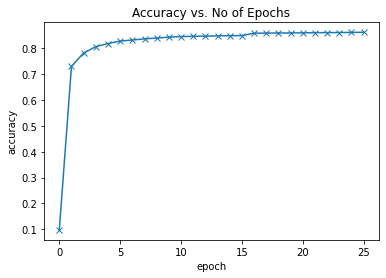

In [83]:
#collecting accuarcies of validation runs and plotting
history = [result0] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No of Epochs')

## Testing the model
- using test dataset, which model has never seen so far.
- will take tricky images to show model is not accurate.
- Why model is not accurate? -> We just took pixel brightness in to account to predict the number, but pixel relation not accounted in this model.

In [100]:
#defining test dataset
test_dataset = MNIST(root = 'data/', train=False, transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 6


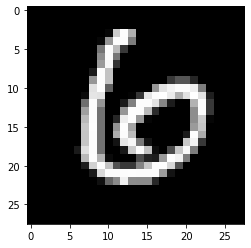

In [105]:
#sample image from test dataset
img, label = test_dataset[11]
plt.imshow(img[0], cmap = 'gray')
print('Shape:',img.shape)
print("Label:",label)

In [104]:
#built model can work with batches only. unsqueeze will add one dimension to taken image.
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 , Predicted Label: 7


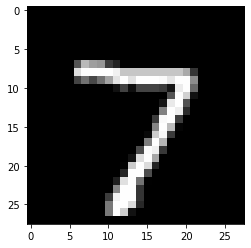

In [106]:
#doing first prediction
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 6 , Predicted Label: 6


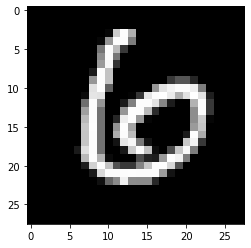

In [107]:
img, label = test_dataset[11]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 5 , Predicted Label: 5


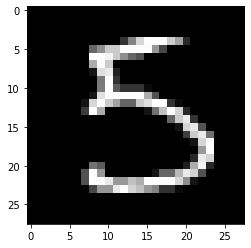

In [108]:
img, label = test_dataset[15]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 5 , Predicted Label: 5


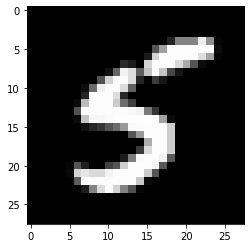

In [109]:
img, label = test_dataset[155]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 0 , Predicted Label: 0


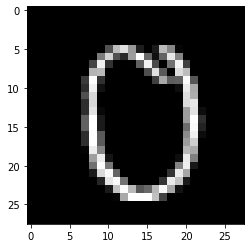

In [110]:
img, label = test_dataset[1775]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 9 , Predicted Label: 7


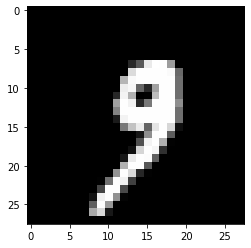

In [112]:
img, label = test_dataset[1000]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

- Prediction wrong.

In [113]:
test_loader = DataLoader(test_dataset, batch_size = 255)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8671924471855164, 'val_loss': 0.5841460227966309}

- Very Good result on test dataset.
- Model accracy on validation dataset = 86.12%
- Model accracy on test dataset = 86.71%

## Saving weights and biases to disc
- colab shuts down also it will be with files

In [119]:
#seeing optimized wwights and biases
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0270, -0.0319, -0.0065,  ...,  0.0283, -0.0349,  0.0323],
                      [ 0.0175, -0.0141,  0.0139,  ..., -0.0232, -0.0071,  0.0353],
                      [-0.0170, -0.0021, -0.0327,  ...,  0.0061,  0.0234, -0.0130],
                      ...,
                      [ 0.0106, -0.0126, -0.0061,  ..., -0.0197,  0.0336, -0.0059],
                      [ 0.0192, -0.0018,  0.0176,  ..., -0.0067, -0.0023, -0.0303],
                      [-0.0352,  0.0185,  0.0082,  ...,  0.0301,  0.0072,  0.0264]])),
             ('linear.bias',
              tensor([-0.0561,  0.0953, -0.0377, -0.0518,  0.0032,  0.0864,  0.0167,  0.0167,
                      -0.0944,  0.0219]))])

In [115]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [117]:
model2 = MnistModel()

In [118]:
#loading saved weights and biases to new model
model2.load_state_dict(torch.load('mnist-logistic.pth'))
#printing model2 initial weights and biases
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0270, -0.0319, -0.0065,  ...,  0.0283, -0.0349,  0.0323],
                      [ 0.0175, -0.0141,  0.0139,  ..., -0.0232, -0.0071,  0.0353],
                      [-0.0170, -0.0021, -0.0327,  ...,  0.0061,  0.0234, -0.0130],
                      ...,
                      [ 0.0106, -0.0126, -0.0061,  ..., -0.0197,  0.0336, -0.0059],
                      [ 0.0192, -0.0018,  0.0176,  ..., -0.0067, -0.0023, -0.0303],
                      [-0.0352,  0.0185,  0.0082,  ...,  0.0301,  0.0072,  0.0264]])),
             ('linear.bias',
              tensor([-0.0561,  0.0953, -0.0377, -0.0518,  0.0032,  0.0864,  0.0167,  0.0167,
                      -0.0944,  0.0219]))])